# XGBoost

In [1]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import classification_report

from model_utils import calc_gini_coef, plot_pr_curve, plot_roc_curve

In [2]:
from model_utils import split_dataset, split_dataset_v2

# CLIENT_PATH = '../data/initial/CLIENTS.csv'
# FEATURES_PATH = '../data/features/features_no_row_delete_inner_join.csv'
# X_train, X_valid, X_test, y_train, y_valid, y_test = split_dataset(CLIENT_PATH, FEATURES_PATH, valid_size=0.2)

FEATURES_PATH = '../data/features/features_auto_v2.csv'
X_train, X_valid, X_test, y_train, y_valid, y_test = split_dataset_v2(FEATURES_PATH, valid_size=0.2)

In [3]:
# noinspection PyTypeChecker
model = xgb.XGBClassifier(
    n_estimators=2000,
    learning_rate=0.02,
    max_depth=3,
    min_child_weight=10,
    reg_alpha=1.0,
    reg_lambda=2.0,
    subsample=0.7,
    colsample_bytree=0.5,
    objective='binary:logistic',
    scale_pos_weight=3,
    n_jobs=14,
    random_state=42,
    eval_metric='logloss',
    early_stopping_rounds=50,
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    verbose=100,
)

[0]	validation_0-logloss:0.68695	validation_1-logloss:0.68704
[100]	validation_0-logloss:0.59204	validation_1-logloss:0.59570
[200]	validation_0-logloss:0.56650	validation_1-logloss:0.57368
[300]	validation_0-logloss:0.55099	validation_1-logloss:0.56276
[400]	validation_0-logloss:0.53938	validation_1-logloss:0.55552
[500]	validation_0-logloss:0.52933	validation_1-logloss:0.55012
[600]	validation_0-logloss:0.52106	validation_1-logloss:0.54680
[700]	validation_0-logloss:0.51279	validation_1-logloss:0.54274
[800]	validation_0-logloss:0.50492	validation_1-logloss:0.53893
[900]	validation_0-logloss:0.49771	validation_1-logloss:0.53670
[1000]	validation_0-logloss:0.49102	validation_1-logloss:0.53442
[1100]	validation_0-logloss:0.48502	validation_1-logloss:0.53237
[1200]	validation_0-logloss:0.47867	validation_1-logloss:0.53038
[1300]	validation_0-logloss:0.47274	validation_1-logloss:0.52840
[1400]	validation_0-logloss:0.46701	validation_1-logloss:0.52690
[1500]	validation_0-logloss:0.46059	v

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.5
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,'logloss'


In [4]:
y_true = y_train
y_pred_proba = model.predict_proba(X_train)[:, 1]
# y_true = y_valid
# y_pred_proba = model.predict_proba(X_valid)[:, 1]
# y_true = y_test
# y_pred_proba = model.predict_proba(X_test)[:, 1]

Gini Coefficient:  0.8005848981272115


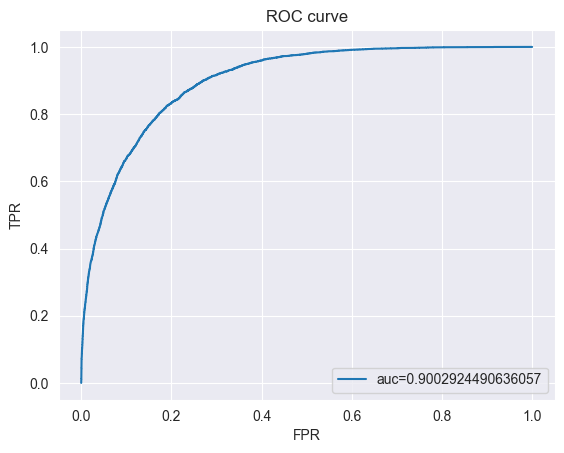

In [5]:
gini_coef = calc_gini_coef(y_true, y_pred_proba)
print('Gini Coefficient: ', gini_coef)

plot_roc_curve(y_true, y_pred_proba)

In [6]:
y_pred = (y_pred_proba >= 0.5).astype(int)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87     16628
           1       0.58      0.83      0.68      5466

    accuracy                           0.81     22094
   macro avg       0.76      0.82      0.78     22094
weighted avg       0.85      0.81      0.82     22094



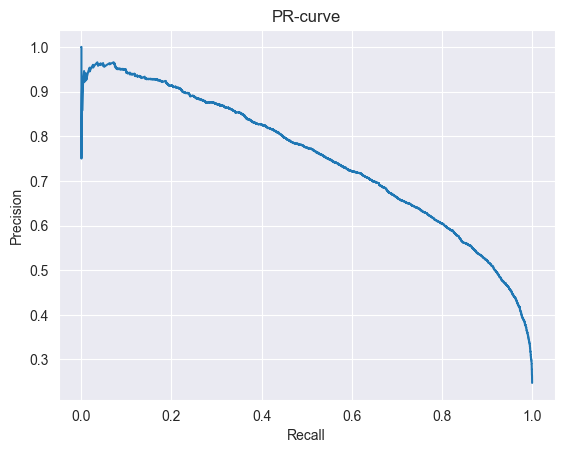

In [7]:
plot_pr_curve(y_true, y_pred_proba)

In [ ]:
# Feature importance
for imp_type in ('weight', 'gain'):
    fig, ax = plt.subplots(figsize=(10, 6))
    xgb.plot_importance(model, ax=ax, importance_type=imp_type, max_num_features=25)
    plt.title(f'XGBoost Feature Importance (Top 25 by {imp_type})')
    plt.show()